# Basic Data Analysis

## Pandas

In [150]:
import pandas as pd

In [3]:
df_driver = pd.read_csv("../data/driver_info.csv")
df_driver.head(3)

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date
0,27,9.0,865,19.0,l17437965W,1,2019-4-2
1,46,7.9,2116,11.0,Z12362316j,0,2021-11-19
2,59,7.8,947,4.0,g11098715c,0,2021-1-15


- Task 1

In [16]:
# Чему равняется медиана возраста водителей? Округлите ответ до целого.  
print("Median", df_driver.age.median())

# Какой минимальный рейтинг у водителя? (user_rating). Ответ округлите до первого знака после точки.  
print("Min rating", df_driver.user_rating.min())

# Какое самое частое число инцидентов у водителей? (user_time_accident). Укажите целое число.  
print("Mode time accedent", df_driver.user_time_accident.mode().iloc[0])

# Сколько строк в датасете?  
print("N Rows", df_driver.shape[0])

# Какой самый популярный пол? Введите число. 
print("Most popular sex", df_driver.sex.mode().iloc[0])

Median 33.0
Min rating 5.8
Mode time accedent 6.0
N Rows 15153
Most popular sex 0


- Task 2

In [17]:
"""
Объект pd.DataFrame() помещен в переменную df1.
Второй объект pd.DataFrame() помещен в переменную df2.
Обе таблицы имеют одинаковый набор столбцов: user_id, car_id, rating, stop_times.

Задача:
Соединить эти две таблицы вместе.
Оставить только строки, где rating > 4 и stop_times равен 2, 3 или 5.
В получившемся датафрейме оставить только те строки, где car_id не входит в список car_black_list и user_id входит в список user_white_list.
Оставить только строки, где index чётное число (датафрейм проиндексирован целыми числами).
Итоговый объект pd.DataFrame() поместить в переменную result.
"""

# for local testing:
df1 = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2.2.6_df1.csv', index_col=0)
df2 = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2.2.6_df2.csv', index_col=0)

# Учтите, что user_white_list и car_black_list в тестовой системе будут иметь другую длину и другие значения
user_white_list = ['g10995906g', 'H90312511Q', 'C27138482L', 'H22518078t', 'n17438464n', 'F10525768e', 's15596151o', 'i18954748S', 'E84048392U', 'E69893354s']
car_black_list = ['l-4285389z', 'n79502261g', 'N-1839822D']

In [32]:
df = pd.concat((df1, df2), axis=0)
result = df[
    (df.rating > 4) &\
    (df.stop_times.isin([2,3,5])) &\
    (~df.car_id.isin(car_black_list)) &\
    (df.user_id.isin(user_white_list)) &\
    (df.index % 2 == 0)
]
result

,user_id,car_id,rating,stop_times
20,C27138482L,M-1786506l,7.42,2
190,F10525768e,I98930031r,4.21,2
248,s15596151o,u-2070489i,5.39,2


In [18]:
# В ans содержится правильный ответ. Перед отправкой своего решения, сравнитесь с ним.
ans = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_6_ans.csv', index_col=0)
ans

,user_id,car_id,rating,stop_times
20,C27138482L,M-1786506l,7.42,2
190,F10525768e,I98930031r,4.21,2
248,s15596151o,u-2070489i,5.39,2


- Task 3

In [37]:
"""
Вопрос: Сколько водителей имеет количество инцидентов (user_time_accident) на полуинтервале (4.5, 9.0] и age < 40?
"""
df_driver[
    (df_driver.user_time_accident > 4.5) &\
    (df_driver.user_time_accident <= 9) &\
    (df_driver.age < 40)
].user_id.nunique()

2478

- Task 4

In [45]:
"""
Задача:

Создайте столбец tripple_accident из столбца user_time_accident,  умноженного на 3.
Создайте столбец rides_on_rating делением столбца user_rides на user_rating.
Оставьте только те строки, у которых user_time_accident больше 25 (используем фильтрацию).
Оставьте только те строки, у которых age выше среднего значения по полученной таблице в предыдущем пункте.
"""

df = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_8.csv')
df["tripple_accident"] = df.user_time_accident * 3
df["rides_on_rating"] = df.user_rides / df.user_rating
df = df[df.user_time_accident > 25].copy()
df = df[df.age > df.age.mean()].copy()
df

,user_id,user_rating,age,user_rides,user_time_accident,tripple_accident,rides_on_rating
3,E10711310m,8.4,33,322,39.0,117.0,38.333333
64,t25217963K,8.0,30,101,72.0,216.0,12.625000


In [40]:
# В ans содержится правильный ответ. Перед отправкой своего решения, сравнитесь с ним.
ans = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_8_ans.csv', index_col=0)
ans

,user_id,user_rating,age,user_rides,user_time_accident,tripple_accident,rides_on_rating
3,E10711310m,8.4,33,322,39.0,117.0,38.333333
64,t25217963K,8.0,30,101,72.0,216.0,12.625000


- Task 5

In [93]:
"""
Задача:
- Добавьте новую строку (с индексом new_index:(int / str) и значениями new_data:list).
- Удалите строки с индексами из списка del_index_list: list.
- Увеличьте значение destroy_degree на 1 в строке с индексом равным index. Переменная index содержит индекс строки ИЛИ число (индекс).
- Удалите столбец fix_date, т.к. не стоит сейчас думать о времени.
- Создайте новый столбец efficient, который равен destroy_degree деленный на work_duration.
- Возведите столбец work_duration в квадрат.
- Переименуйте столбец work_duration в work_duration_square.
- Удалите дубликаты по столбцу car_id.
"""

df = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_10.csv')

# Учтите, что new_index, new_data, del_index_list, index в тестовой системе будут иметь другие значения
new_index = 50
new_data = ['new_car_id', 'new_worker_id', '2019-11-11 4:44','refuel_check', 3.5, 10]
del_index_list = [41, 18, 33, 7, 46]
index = 22

if new_index in df.index:
    df.loc[new_index, :] = new_data
else:
    df_new = pd.DataFrame([new_data], index=[new_index], columns=df.columns)
    df = pd.concat((df, df_new), axis=0).copy()

df.drop(del_index_list, axis=0, inplace=True, errors="ignore")
df.loc[index, "destroy_degree"] += 1

df.drop(["fix_date"], axis=1, inplace=True, errors="ignore")

df["efficient"] = df.destroy_degree / df.work_duration

df.work_duration = df.work_duration.apply(lambda x: x ** 2)

df.rename({"work_duration": "work_duration_square"}, axis=1, inplace=True)

df = df.loc[~df.duplicated(["car_id"], keep="first")].copy()

In [97]:
# В ans содержится правильный ответ. Перед отправкой своего решения, сравнитесь с ним.
ans = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_10_ans.csv', index_col=0)

- Task 6

In [110]:
"""
Задача:

Отсортируйте строки сначала по убыванию 1-го столбца из списка sort_by_list, затем по возрастанию 2-го столбца из списка.
Удалите столбцы из списка cols2drop с учетом того, что некоторых столбцов может не быть в df.
Сделайте порядок столбцов в df в соответствии с переменной columns_order_list: List[str].
Удалите строки, в которых car_rating < critical_car_rating.
Удалите строки, где число поездок riders больше 10_000, или тип машины car_type относится либо к standart, либо к economy.
"""

df = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2.2.11.csv')

# Учтите, что sort_by_list, cols2drop, columns_order_list в тестовой системе будут иметь другие значения.
sort_by_list = ['car_rating', 'riders']
cols2drop = ['random_name_1', 'target_reg', 'target_class', 'random_name_2']
columns_order_list = ['model', 'car_type', 'car_id', 'car_rating', 'year_to_start', 'year_to_work', 'riders', 'fuel_type']
critical_car_rating = 2

df.sort_values(by=[sort_by_list[0], sort_by_list[1]], ascending=[False, True], inplace=True)
df.drop(cols2drop, axis=0, errors="ignore", inplace=True)
df = df[columns_order_list].copy()
df = df.loc[~(df.car_rating < critical_car_rating)].copy()
df = df.loc[
    ~((df.riders > 10_000) |\
    (df.car_type.isin(["standart", "economy"])))
].copy()

In [121]:
# В ans содержится правильный ответ. Перед отправкой своего решения, сравнитесь с ним.
ans = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_11_ans.csv', index_col=0)
assert df.shape == ans.shape
assert all(df.columns == ans.columns)
assert (df == ans).all().all()

- Task 7

In [135]:
"""
Выполните по пунктам:

Запишите в переменную mean_rating среднее по столбцу car_rating .
Увеличьте на один все значения в столбцах car_rating и year_to_work.
Отфильтруйте любым из удобных способов машины с рейтингом выше среднего от столбца car_rating (используйте переменную mean_rating).
Преобразуйте столбец year_to_work следующим образом: если значение меньше 2017, то прибавьте 2, иначе разделите значение нацело на 5.
Переименуйте столбец year_to_start в new_year_to_start и удалите столбец fuel_type.
Ко всем значениям из столбца car_type добавьте приставку super_ (standart -> super_standart).
Решение запишите в переменную result.
"""

df = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_12.csv', index_col=0)

mean_rating = df.car_rating.mean()
df[["car_rating", "year_to_work"]] += 1
df = df.loc[df.car_rating > mean_rating].copy()
df["year_to_work"] = df["year_to_work"].apply(lambda x: x + 2 if x < 2017 else x // 5)
df.rename({"year_to_start": "new_year_to_start"}, axis=1, inplace=True)
df.drop(["fuel_type"], inplace=True, axis=1, errors="ignore")
df.car_type = df.car_type.apply(lambda x: f"super_{x}")
result = df

In [138]:
# В ans содержится правильный ответ. Перед отправкой своего решения, сравнитесь с ним.
ans = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_12_ans.csv', index_col=0)

assert ans.shape == result.shape
assert all(ans.columns == result.columns)
assert all(ans.index == result.index)
assert (ans == result).all().all()

- Task 8

In [141]:
"""
Задача:

Добавьте столбец flag, который равен 'good_line', если rating > 5 and speed_max < 100. 'bad_line', если  rating > 5 and speed_max > 100. 'undefined' в остальных случаях.
Добавьте столбец speed_check, который принимает значения 'avg_more', если distance/ride_duration > speed_avg, иначе 'avg_less'.
Удалите столбцы из списка cols2drop.
Удалите строки, в которых car_id имеет пустые значения (только NA удаляем).
Результат запишите в переменную result.
"""

df = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_13.csv')

# Учтите, что cols2drop в тестовой системе будет иметь другие значения.
cols2drop = ['ride_cost', 'stop_times', 'user_ride_quality']

def set_flag(rating: int, speed_max: int) -> str:
    if rating > 5 and speed_max < 100:
        return "good_line"
    elif rating > 5 and speed_max > 100:
        return "bad_line"
    else:
        return "undefined"

df["flag"] = df.apply(lambda x: set_flag(x.rating, x.speed_max), axis=1)
df["speed_check"] = df.apply(lambda x: "avg_more" if (x.distance / x.ride_duration > x.speed_avg) else "avg_less", axis=1)
df.drop(cols2drop, axis=1, errors="ignore", inplace=True)
result = df.loc[~df.car_id.isna()].copy()

In [142]:
# В ans содержится правильный ответ. Перед отправкой своего решения, сравнитесь с ним.
ans = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_13_ans.csv', index_col=0)

assert ans.shape == result.shape
assert all(ans.columns == result.columns)
assert all(ans.index == result.index)
assert (ans == result).all().all()

In [149]:
"""
Задача:

Посчитайте количество пропусков в каждой строке и запишите это в новый столбец nans_num.
Удалите строки, где количество пропусков больше 2.
Удалите строки, где age имеет пропущенные значения.
Заполните пропущенные значения в столбце user_time_accident медианным значением.
Оставьте только столбцы age, user_rides, user_time_accident.
Решение запишите в переменную result.
"""

df = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_14.csv')

df["nans_num"] = df.isna().sum(axis=1)
df = df.loc[~(df.nans_num > 2)].copy()
df = df.loc[~df.age.isna()].copy()
df.user_time_accident = df.user_time_accident.fillna(df.user_time_accident.median())
result = df[["age", "user_rides", "user_time_accident"]].copy()

In [156]:
# В ans содержится правильный ответ. Перед отправкой своего решения, сравнитесь с ним.
ans = pd.read_csv('https://stepik.org/media/attachments/lesson/681964/2_2_14_ans.csv', index_col=0)

assert ans.shape == result.shape
assert all(ans.columns == result.columns)
assert all(ans.index == result.index)
assert (ans.fillna(0) == result.fillna(0)).all().all()

## Vizualisation: seaborn & matplotlib

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
COLOR_LALETTE = sns.color_palette("pastel")
sns.set_palette(COLOR_LALETTE)
COLOR_LALETTE

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [16]:
path = 'https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv'
df = pd.read_csv(path)
df.head()

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,35.20,electro_bug
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,38.62,gear_stick
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,30.34,engine_fuel
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,30.45,engine_fuel


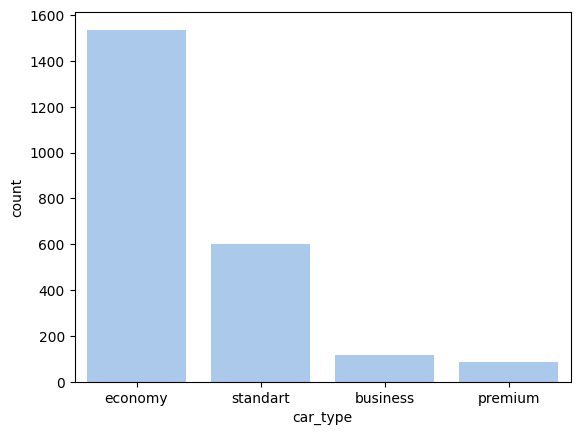

In [48]:
# Второе место по числу поломок приходится на машины типа premium? - FALSE
sns.barplot(df.car_type.value_counts());

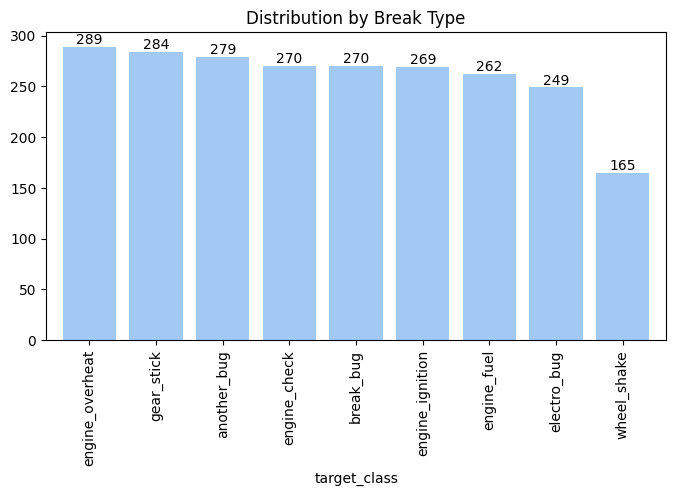

In [47]:
# Поломка класса "engine_check" самая популярная среди всех. - FALSE
ax = df.target_class.value_counts().plot(kind="bar", width=0.8, title="Distribution by Break Type", figsize=(8,4))
ax.bar_label(ax.containers[0]);

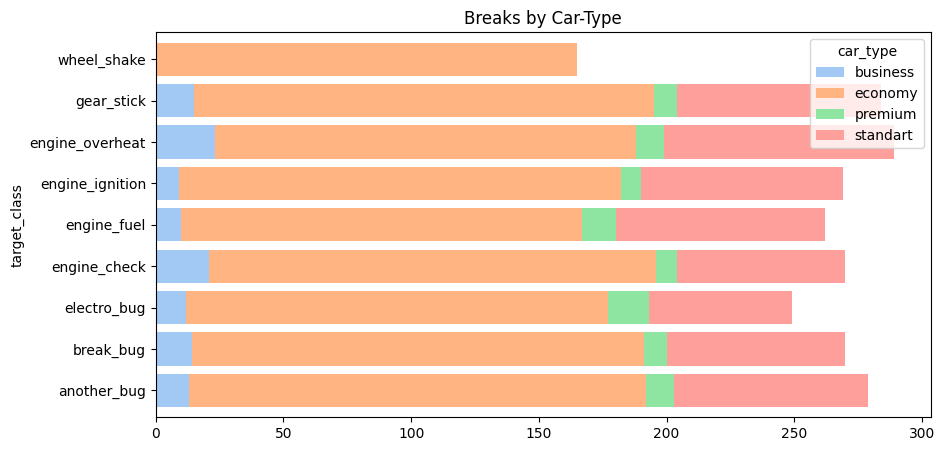

In [49]:
# Поломка "wheel_shake" в основном случалась в сегменте машин типа "standart" - FALSE
# Вид поломки "wheel_shake" меньше остальных представлен среди моделей машин - TRUE
df.groupby("target_class").car_type.value_counts().unstack().fillna(0) \
.plot(kind='barh', stacked=True, width=0.8, title="Breaks by Car-Type", figsize=(10, 5));

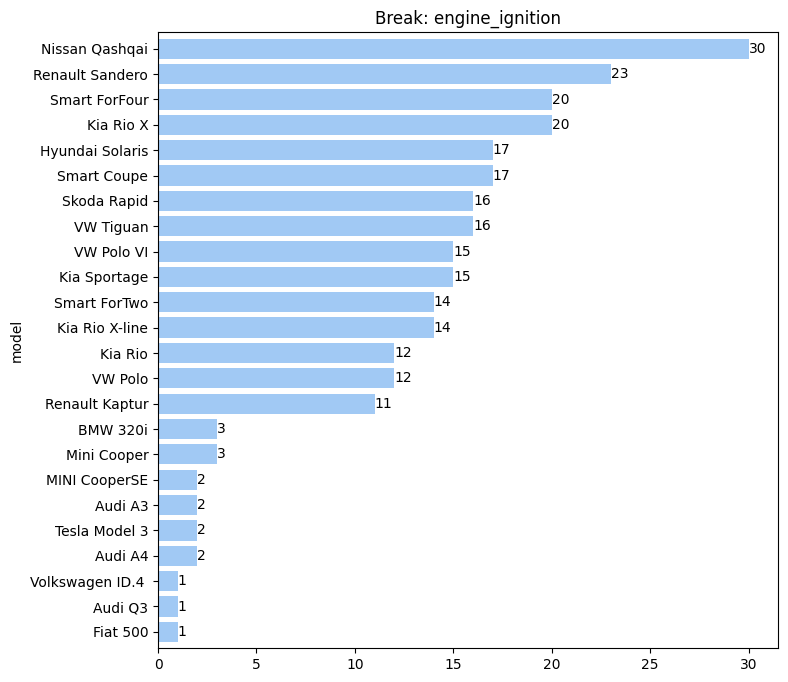

In [76]:
# Модель машины "Nissan Qashqai" имеет максимальное число поломок класса "engine_ignition". - TRUE
ax = df[df.target_class == "engine_ignition"].model.value_counts()[::-1] \
    .plot(kind="barh", figsize=(8,8), width=0.8, title="Break: engine_ignition")
ax.bar_label(ax.containers[0]);

<Axes: title={'center': 'MINI Electro Break Types'}, xlabel='target_class'>

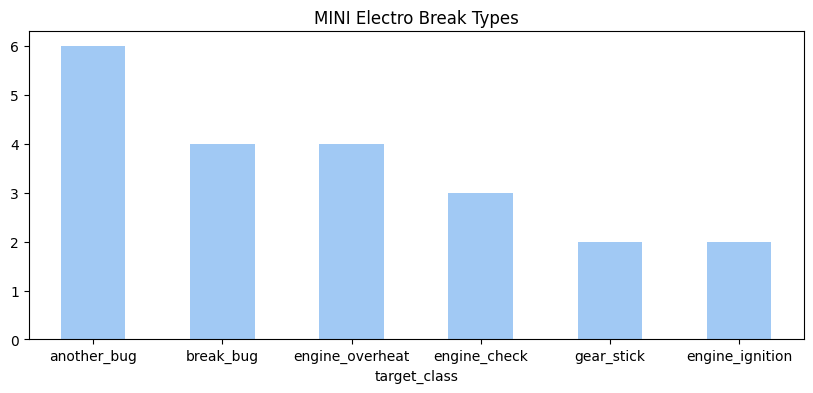

In [79]:
# У электрокара "MINI CooperSE" отсутствуют поломки типа "electro_bug". - TRUE
df[
    df.model.str.contains("MINI") &\
    (df.fuel_type == "electro")
].target_class.value_counts().plot(kind="bar", rot=0, figsize=(10,4), title="MINI Electro Break Types")

In [ ]:
df

<hr>

- Dist Plot

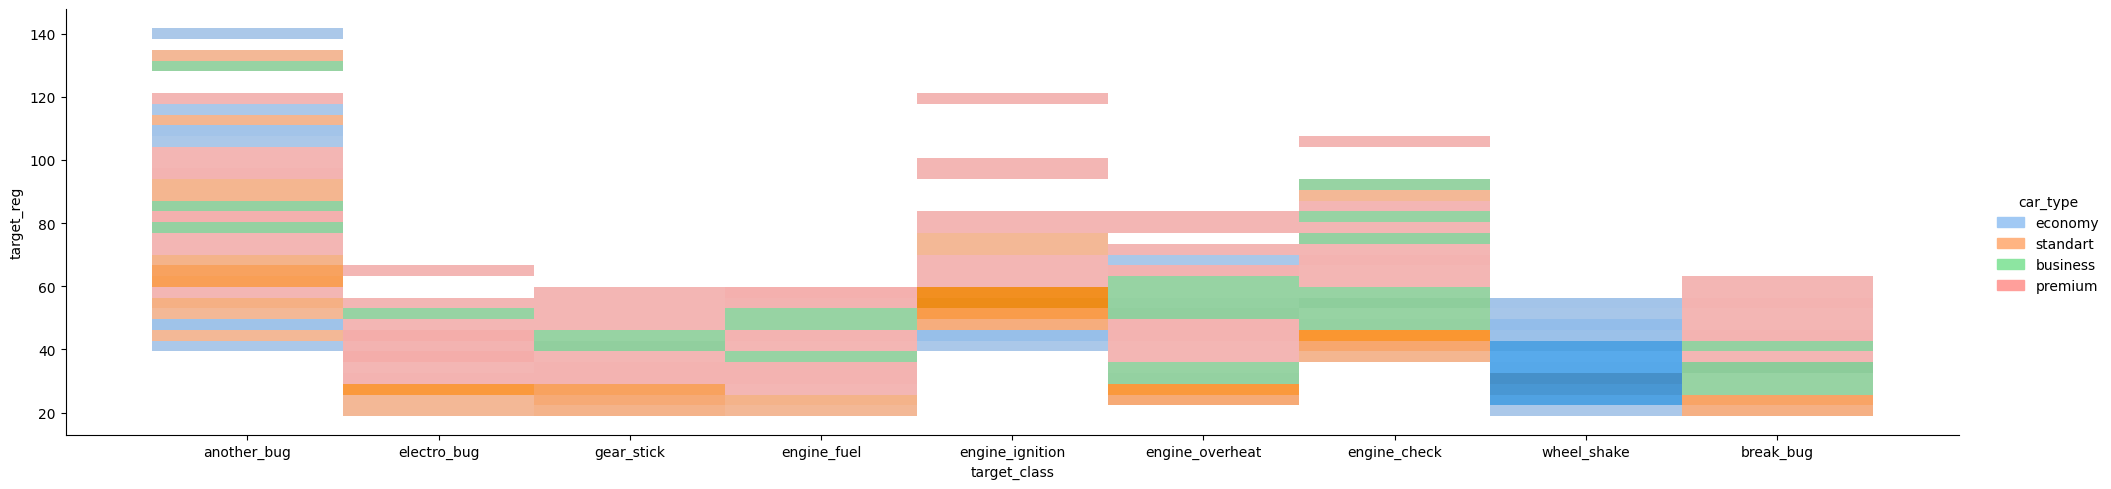

In [83]:
sns.displot(
    data=df,
    kind='hist',
    x='target_class',
    y='target_reg',            
    aspect=4, 
    hue='car_type',
);

- Cat Plot

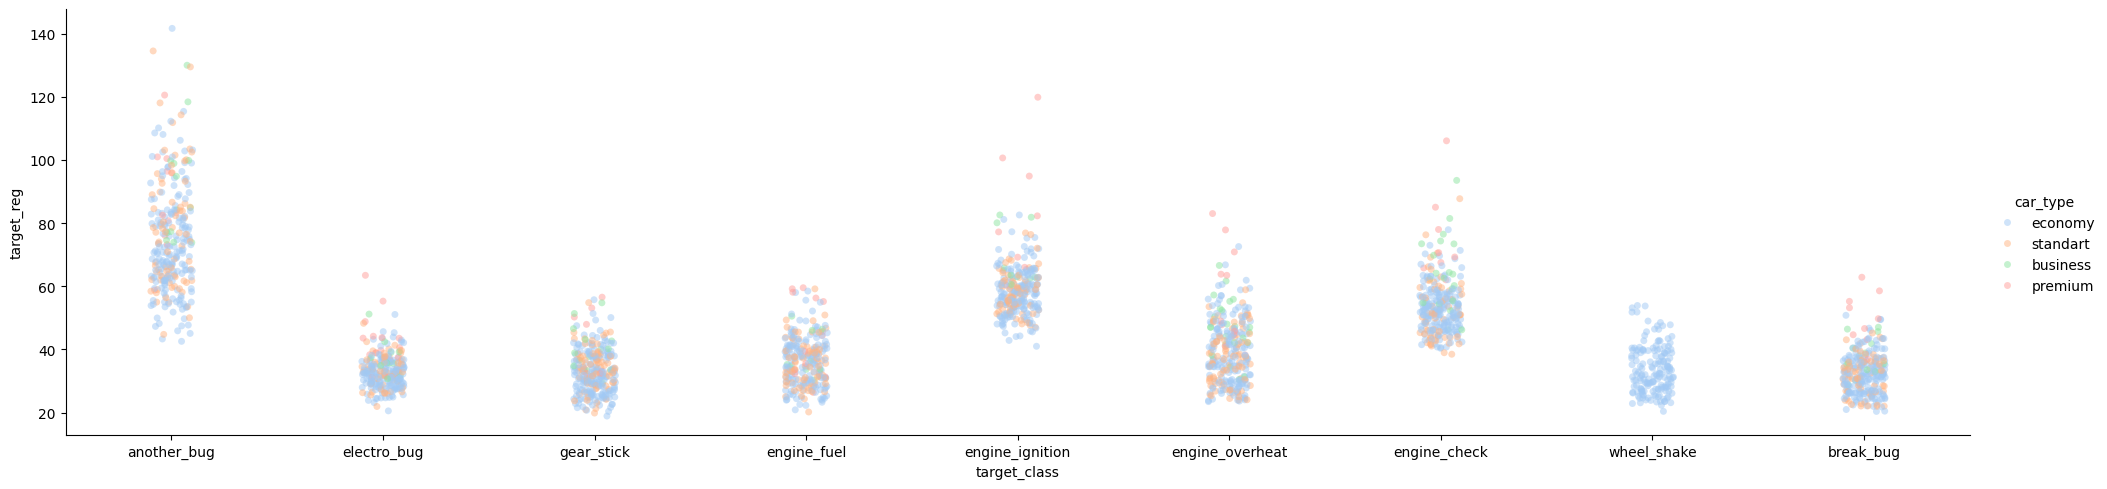

In [86]:
sns.catplot(
    data=df,
    x='target_class',
    y='target_reg',
    hue='car_type',
    aspect=4,
    alpha=0.5,
    orient='v'
);

- Rel Plot

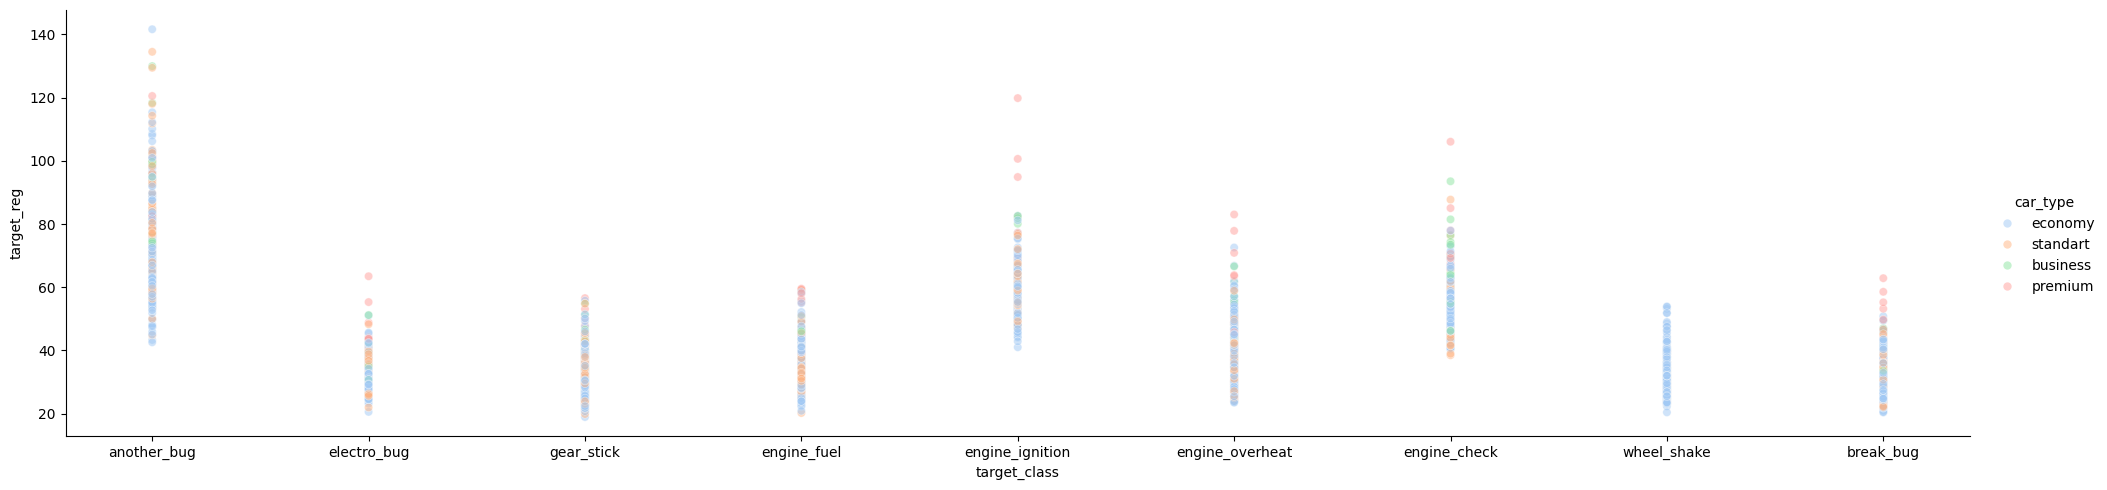

In [87]:
sns.relplot(
    data=df,
    kind='scatter',
    x='target_class',
    y='target_reg',
    aspect=4, 
    alpha=0.5, 
    hue='car_type',
);

### Plot Params

```python
# Fill the gaps
params = {'data' : rides_info,
          'kind' : '?',
          'x' : '?',
          '?' : 'user_time_accident',
          'row' : '?',
          'size' : '?',
          '?' : '?',
          'aspect' : 4, 
          'alpha' : 0.5}
```

In [92]:
import pandas as pd


rides_info = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/rides_info.csv")
cars = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv")
driver_info = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/driver_info.csv")
 
rides_info = rides_info.merge(cars, on="car_id", how="right")
rides_info = rides_info.merge(driver_info, on="user_id", how="left")

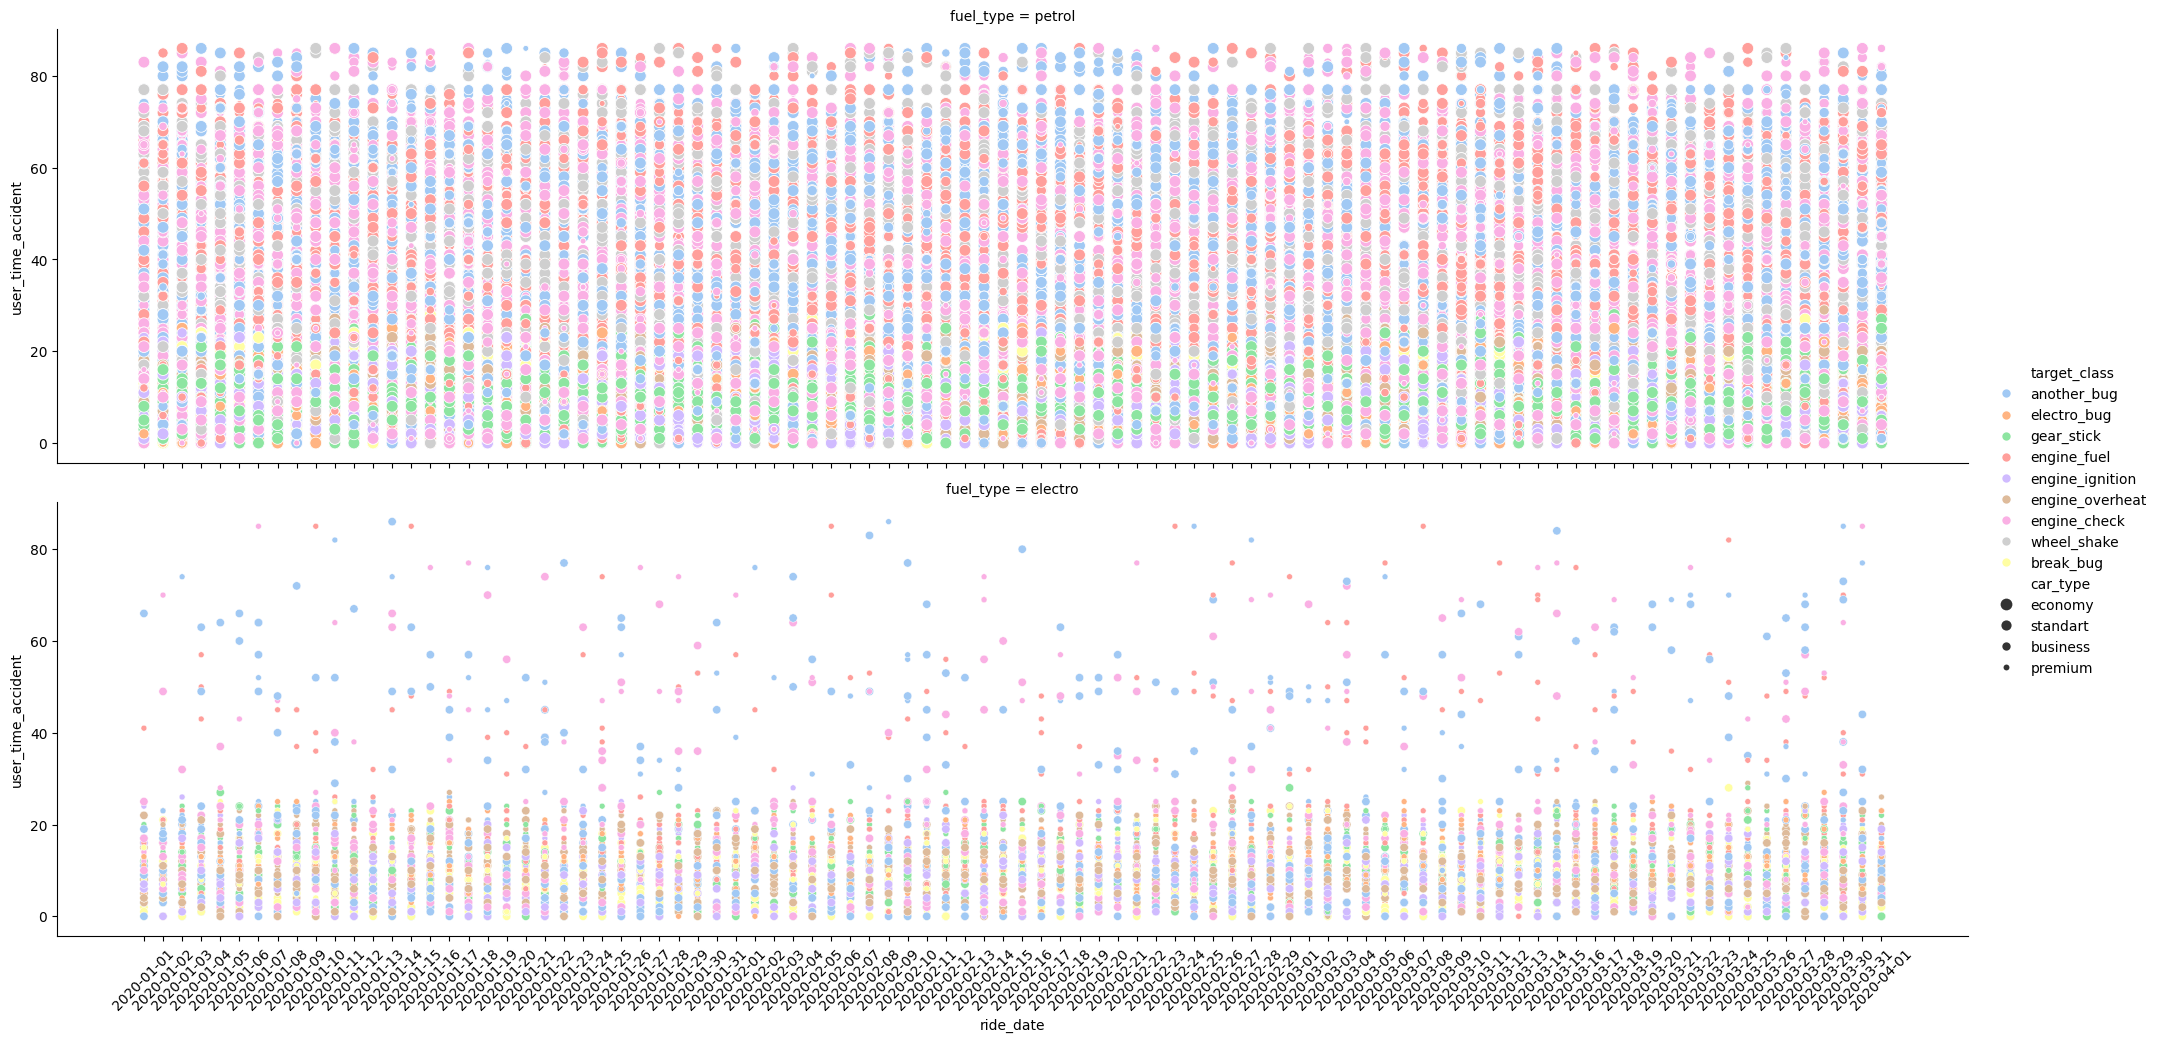

In [91]:
params = {
    'data' : rides_info,
    'kind' : 'scatter',
    'x' : 'ride_date',
    'y' : 'user_time_accident',
    'row' : 'fuel_type',
    'size' : 'car_type',
    'hue' : 'target_class',
    'aspect' : 4, 
    'alpha' : 1.0
}

g = sns.relplot(**params)
plt.xticks(rotation=45);

## Model Validation (cross-validation techniques)

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import StratifiedKFold

### Task: Balanced sampling

In [2]:
df = pd.read_csv("https://stepik.org/media/attachments/lesson/779913/stratified_valid.csv")
df.head()

,car_id,target_reg,num_fold
0,y13744087j,9492.96,NaN
1,O41613818T,2656.23,NaN
2,d-2109686j,1526.11,NaN
3,u29695600e,1338.00,NaN
4,N-8915870N,825.72,NaN


In [34]:
df.target_reg

0        9492.96
1        2656.23
2        1526.11
3        1338.00
4         825.72
          ...   
2332      547.30
2333    26414.19
2334     2677.95
2335     2213.63
2336     2943.33
Name: target_reg, Length: 2337, dtype: float64

In [86]:
n_bins = 50
quantile_grid = np.linspace(0, 1.0, num=n_bins+1)
quantile_values = [df.target_reg.quantile(i) for i in quantile_grid]

df["target_bin"] = pd.cut(
    df.target_reg, bins=quantile_values, right=True, include_lowest=True,
    labels=list(range(n_bins))
)

In [87]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
all_datasets = []
for i, (train_idx, test_idx) in enumerate(skf.split(df, df.target_bin)):
    all_datasets.append(
        df.iloc[test_idx].assign(num_fold=i)
    )

In [91]:
df_final = pd.concat(all_datasets).sort_index()[["car_id", "target_reg", "num_fold"]]
# final metric:
df_final.groupby('num_fold', as_index=False)['target_reg'].agg('mean')['target_reg'].std()

122.66717348894376

In [93]:
sample_submission = pd.read_csv('https://stepik.org/media/attachments/lesson/779913/sample_submission.csv')
sample_submission.columns

Index(['car_id', 'target_reg', 'num_fold'], dtype='object')

In [96]:
df_final[['car_id', 'target_reg', 'num_fold']].to_csv("../data/cross-val-balanced.csv", header=True, index=False)

Range: from 3693.313846153846 to 4039.3438888888886


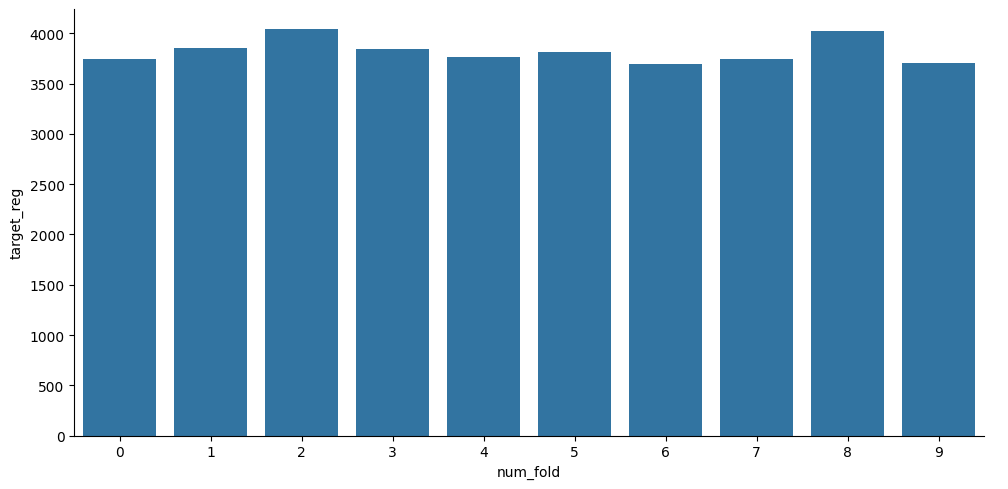

In [89]:
# test yourself:
tmp = df_final.groupby('num_fold', as_index=False)['target_reg'].agg('mean')
print(f"Range: from {tmp.target_reg.min()} to {tmp.target_reg.max()}")
sns.catplot(data = tmp, x = 'num_fold', y = 'target_reg', aspect=2, kind="bar");

## Task: Stratified sampling

In [105]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold

In [198]:
df = pd.read_csv("https://stepik.org/media/attachments/lesson/779913/multi_label.csv")
df.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Chemistry,Astrology,Spaceology,Life Science,Earth Science,Data Science
0,9431,1,0,1,1,0,0,0,0,0,0,0,0
1,7960,1,1,0,1,0,0,0,0,0,0,0,1
2,8578,1,1,0,1,0,0,0,0,0,1,0,0
3,1651,1,0,1,1,0,0,0,0,0,0,0,0
4,4011,1,0,1,1,0,0,0,0,0,0,0,0


In [199]:
target_cnt = df.iloc[:, 1:].sum().sort_values()
target_cnt

Spaceology                 9
Astrology                 41
Earth Science             70
Quantitative Finance     120
Quantitative Biology     287
Chemistry                513
Statistics              2500
Mathematics             2702
Physics                 2869
Computer Science        4062
Data Science            4955
Life Science            5078
dtype: int64

In [205]:
df["kfold"]

0       95
1       95
2       96
3       99
4       99
        ..
9995     2
9996     2
9997     2
9998     0
9999     3
Name: kfold, Length: 10000, dtype: int64

In [257]:
df["kfold"] = 0
for i, col in enumerate(target_cnt.index):
    # define cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=i * 12)
    
    # iterate over different targets:
    for k_fold_i, df_i in df.groupby("kfold"):
        all_test_idxs = []
        for i, (train_idx, test_idx) in enumerate(skf.split(df_i, y=df_i[col])):
            all_test_idxs.append((i, test_idx))
    
    # assign new labels to `kfold`
    for i, idx in all_test_idxs:
        df.loc[idx, "kfold"] = i

In [258]:
def calculate_score():
    targets = ['Computer Science', 'Physics', 'Mathematics', 'Statistics',
               'Quantitative Biology', 'Quantitative Finance', 'Chemistry',
               'Astrology', 'Spaceology', 'Life Science', 'Earth Science', 'Data Science']
    
    tmp = df.groupby(['kfold'], as_index=False).sum()  
    tmp_melt = tmp.melt(id_vars = 'kfold', value_vars = targets, value_name = 'count', var_name = 'class')
    return tmp_melt.groupby(['class'], as_index=False).std()['count'].mean()

In [261]:
# save solution
df.to_csv("../data/cross-val-stratified.csv", header=True, index=False)